In [1]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

from ancilliary_funcs import obtener_descripciones_variables, analizar_variable_discreta

# warnings.filterwarnings('ignore')
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('income-db.csv')
df = df.replace('?', np.nan)

# Analisis del vector objetivo (```income```)

1. Ver su cantidad de datos
2. Ver su distribucion graficamente
3. Ver su cantidad de datos faltantes

In [3]:
vector_objetivo = df['income']

,Frecuencia,Porcentaje
<=50K,37155,0.760718
>50K,11687,0.239282


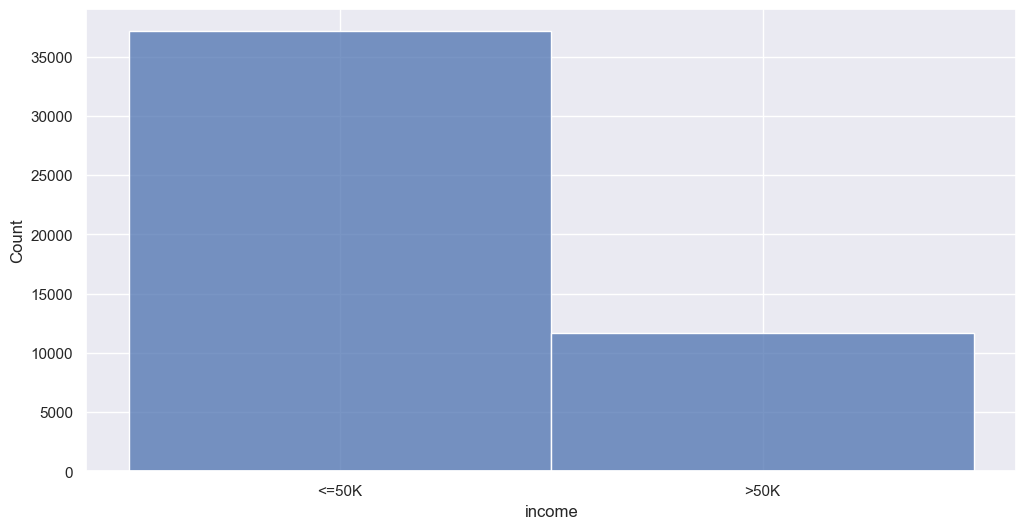

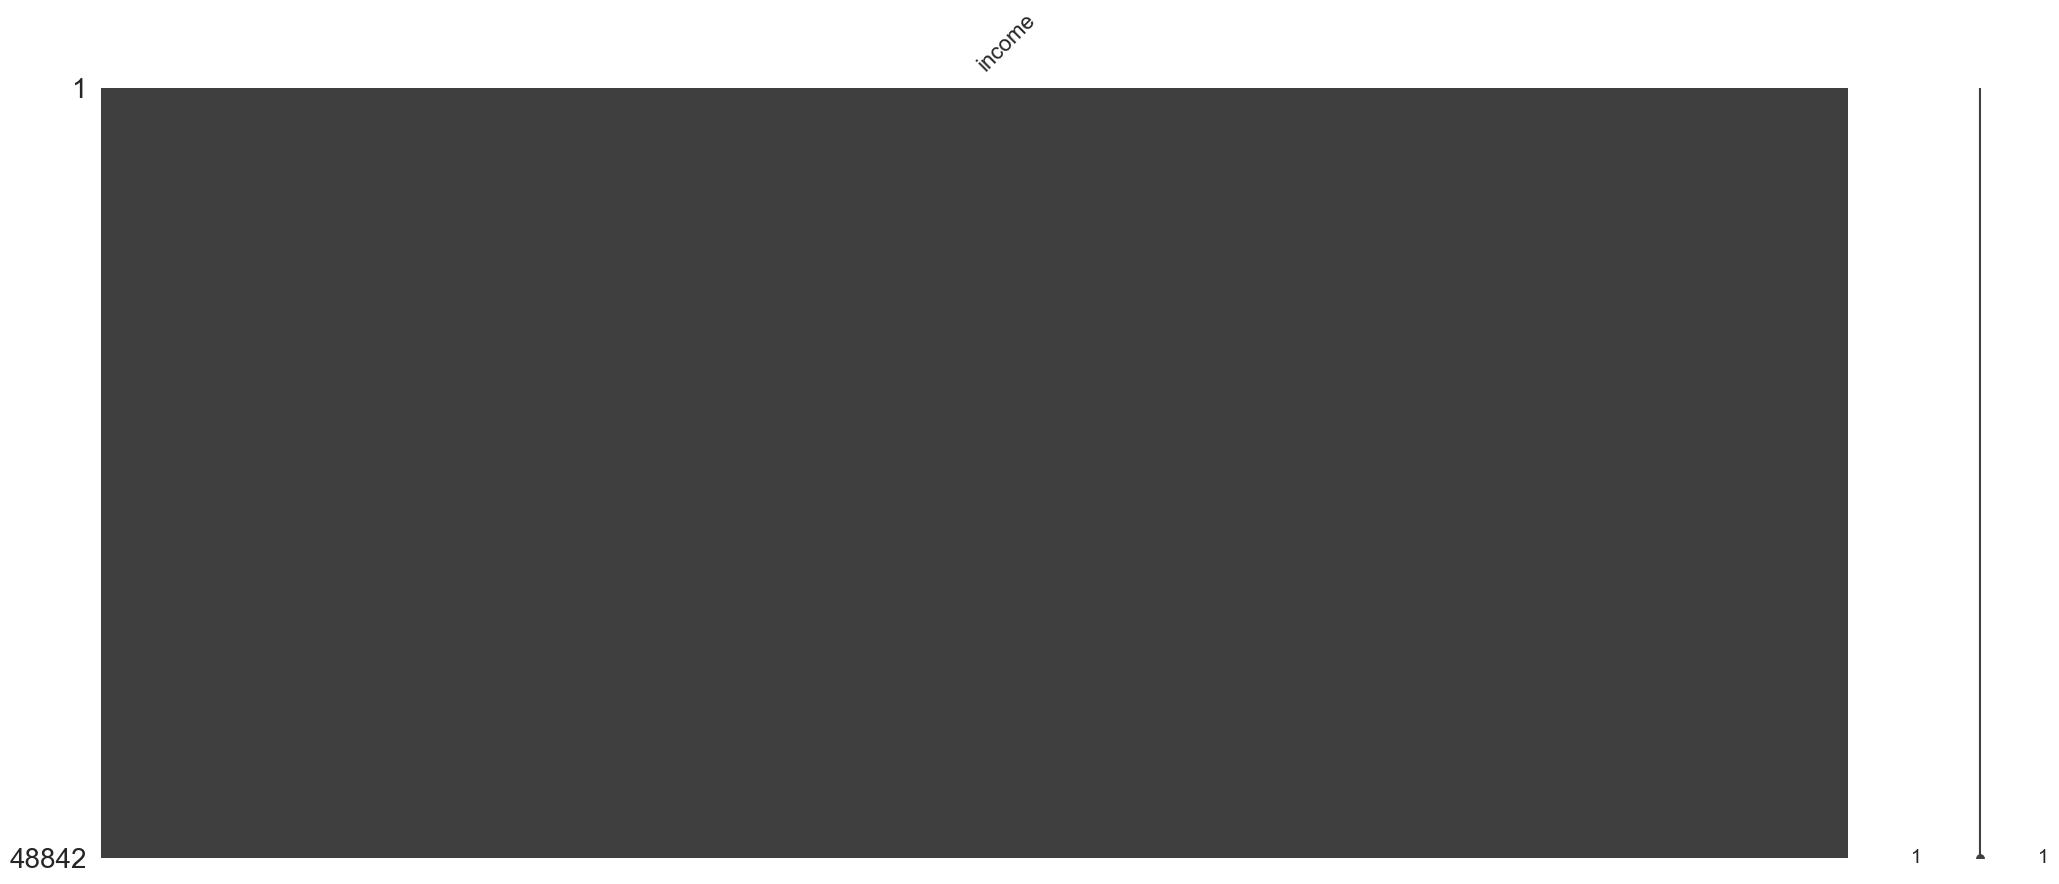

In [4]:
analizar_variable_discreta(vector_objetivo, True)

De los resultados se puede ver que existen 37155 (76% de los datos) personas que ganan igual o
menos de 50K dolares anuales. Por otro lado, existen 11687 (24% de los datos) personas que ganan
sobre los 50K dolares anuales.

Ademas, la variable carece de algun valor faltante. 

# Analisis de variables independientes (todas menos ```income```)

In [5]:
variables_independientes = df.drop(columns='income')

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


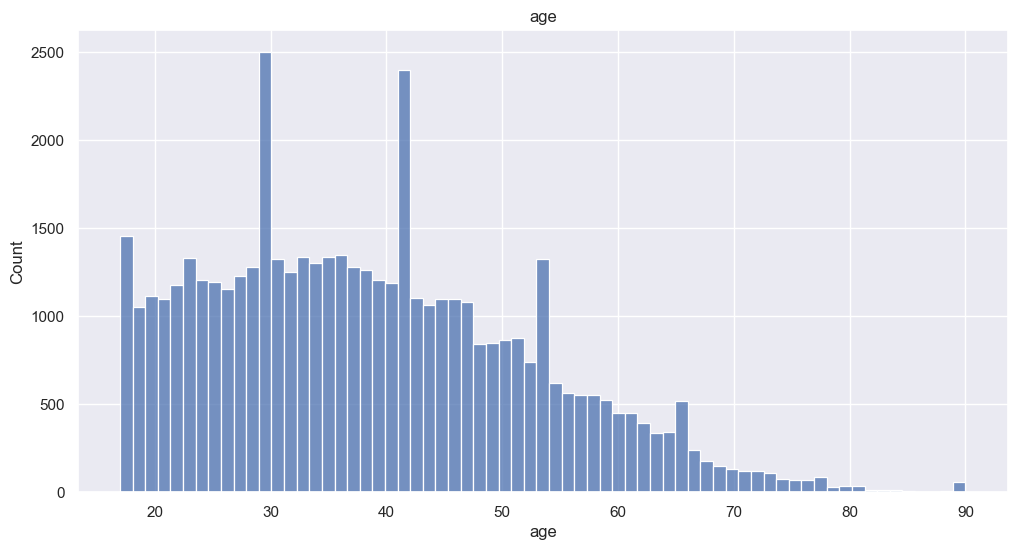

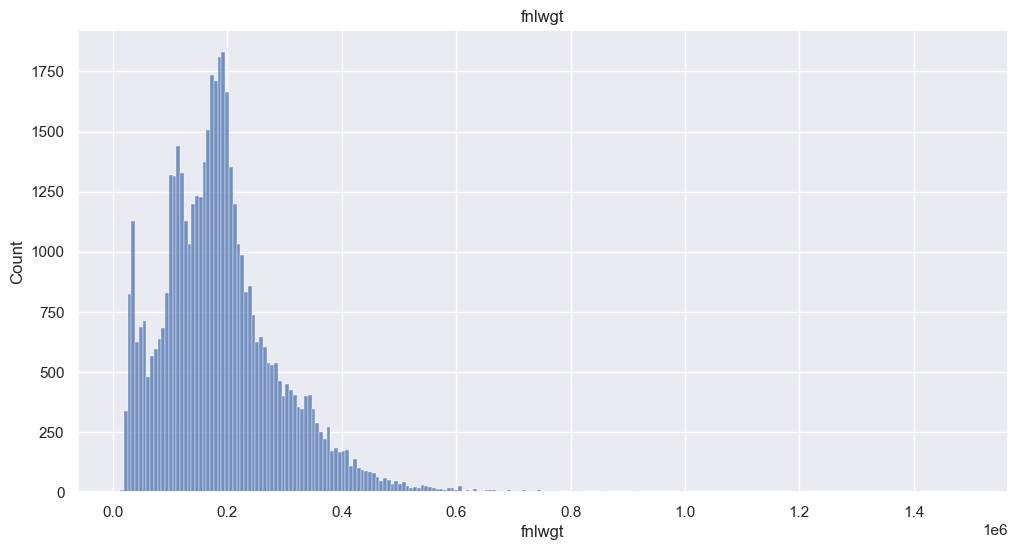

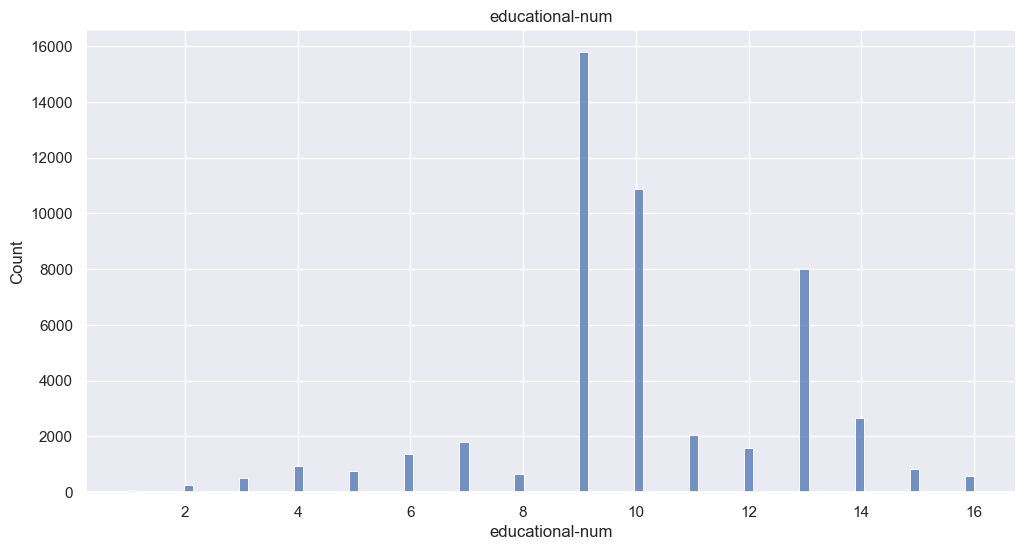

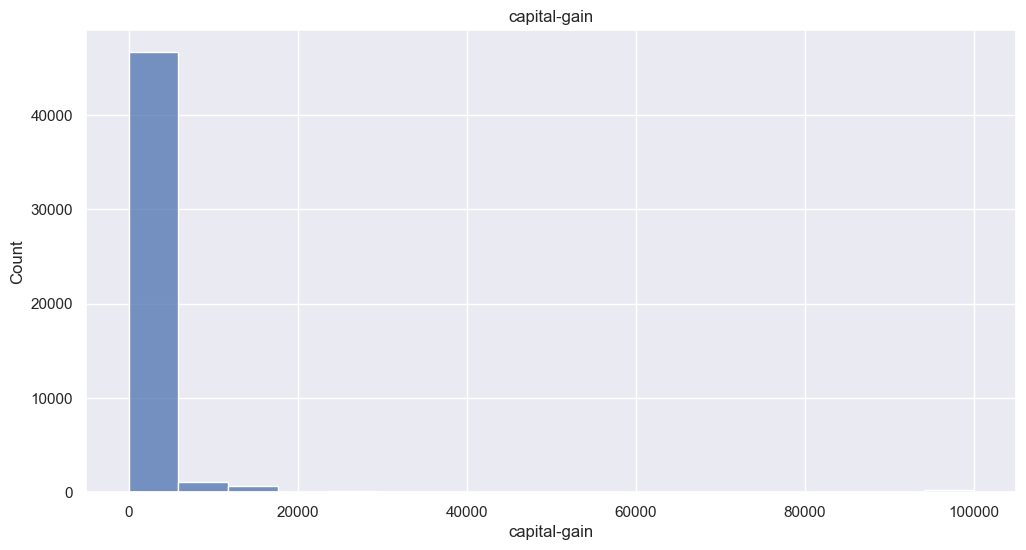

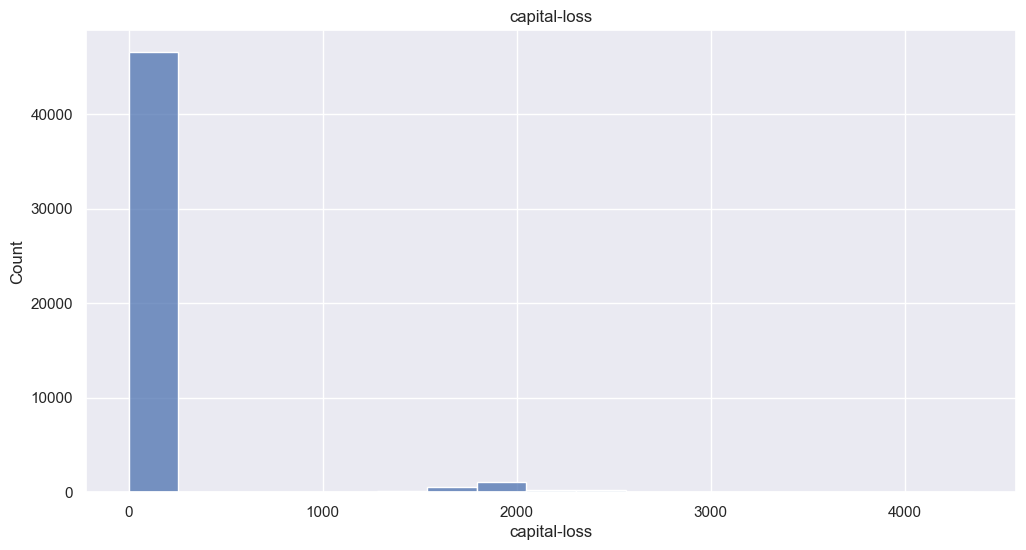

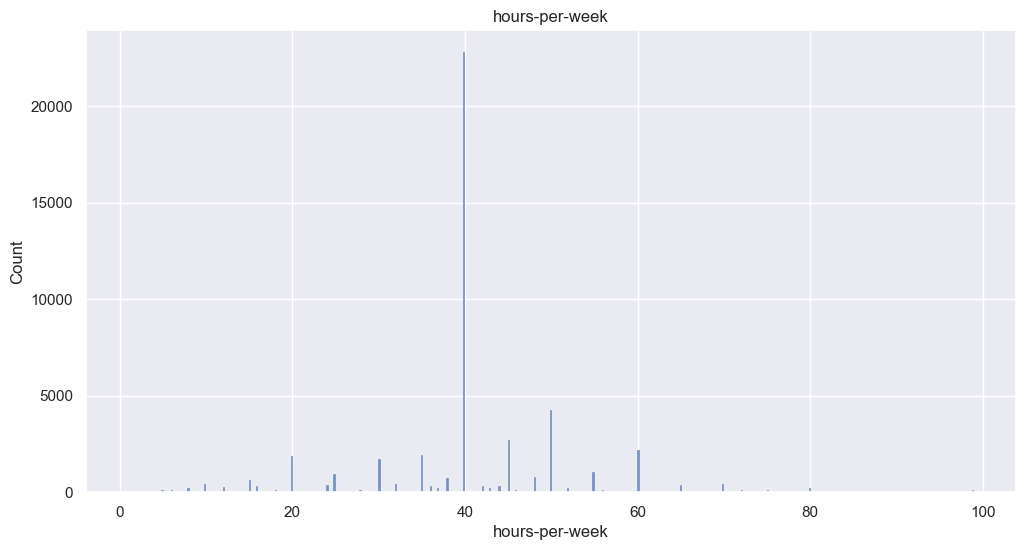

> Var: workclass


,Frecuencia,Porcentaje
Private,33906,0.736399
Self-emp-not-inc,3862,0.083878
Local-gov,3136,0.068110
State-gov,1981,0.043025
Self-emp-inc,1695,0.036813
Federal-gov,1432,0.031101
Without-pay,21,0.000456
Never-worked,10,0.000217


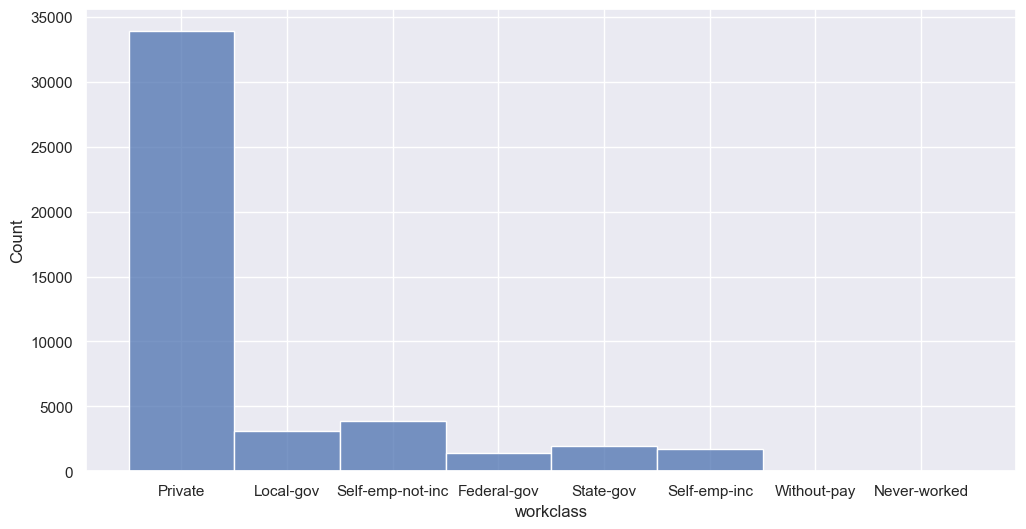

> Var: education


,Frecuencia,Porcentaje
HS-grad,15784,0.323164
Some-college,10878,0.222718
Bachelors,8025,0.164305
Masters,2657,0.054400
Assoc-voc,2061,0.042197
11th,1812,0.037099
Assoc-acdm,1601,0.032779
10th,1389,0.028439
7th-8th,955,0.019553
Prof-school,834,0.017075


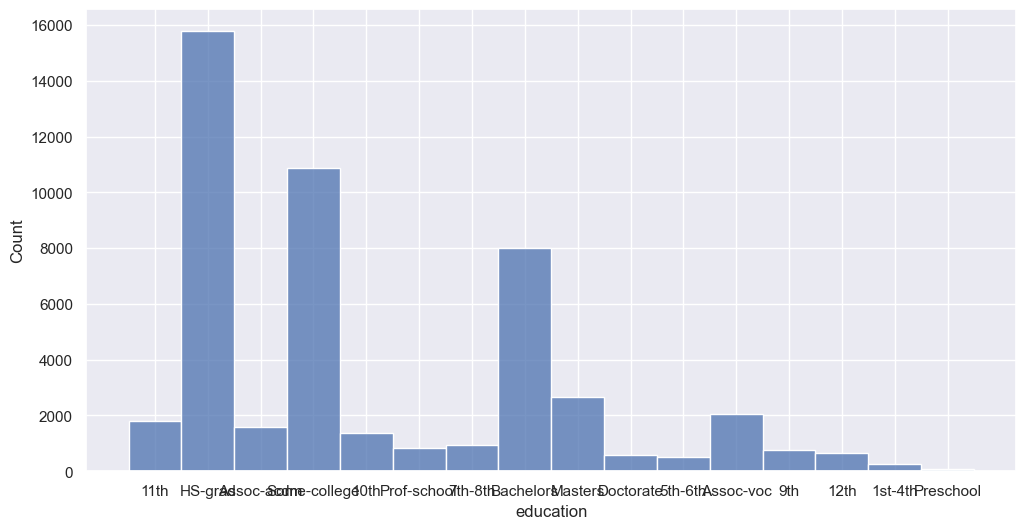

> Var: relationship


,Frecuencia,Porcentaje
Husband,19716,0.403669
Not-in-family,12583,0.257627
Own-child,7581,0.155215
Unmarried,5125,0.104930
Wife,2331,0.047725
Other-relative,1506,0.030834


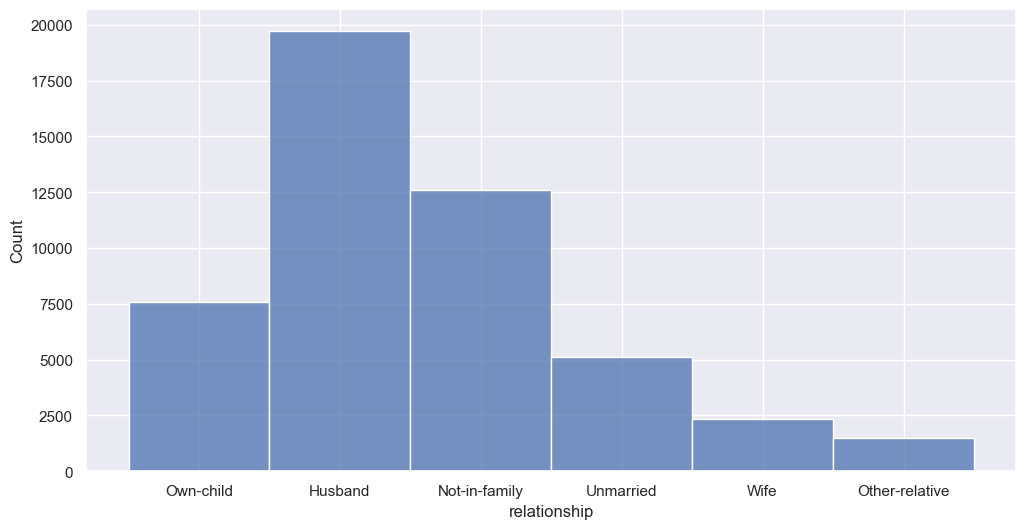

> Var: occupation


,Frecuencia,Porcentaje
Prof-specialty,6172,0.134078
Craft-repair,6112,0.132774
Exec-managerial,6086,0.132210
Adm-clerical,5611,0.121891
Sales,5504,0.119566
Other-service,4923,0.106945
Machine-op-inspct,3022,0.065649
Transport-moving,2355,0.051159
Handlers-cleaners,2072,0.045011
Farming-fishing,1490,0.032368


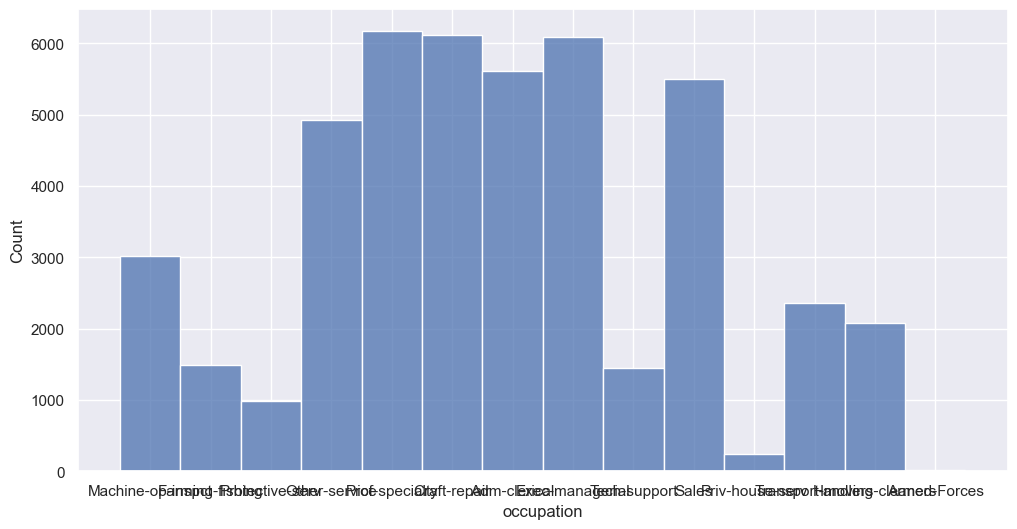

> Var: marital-status


,Frecuencia,Porcentaje
Married-civ-spouse,22379,0.458192
Never-married,16117,0.329982
Divorced,6633,0.135805
Separated,1530,0.031325
Widowed,1518,0.031080
Married-spouse-absent,628,0.012858
Married-AF-spouse,37,0.000758


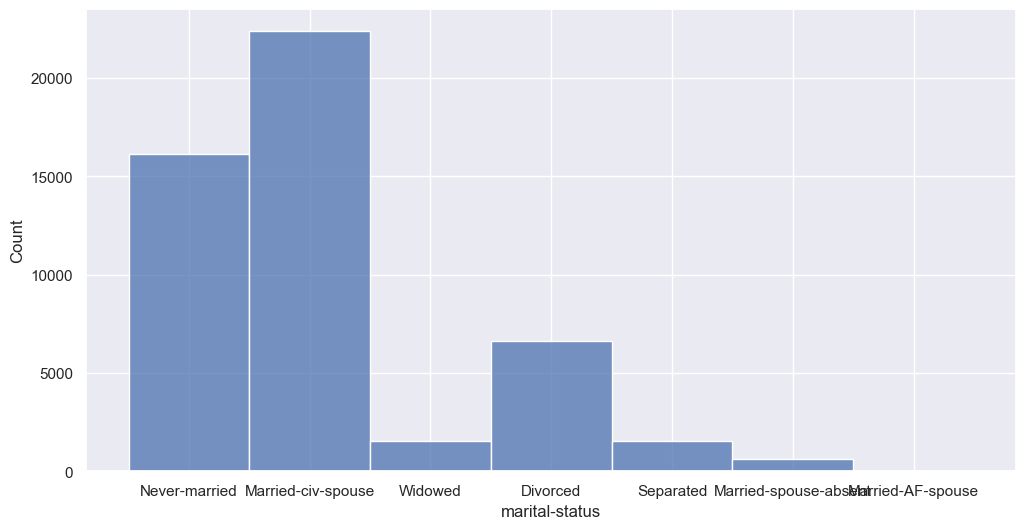

> Var: race


,Frecuencia,Porcentaje
White,41762,0.855043
Black,4685,0.095922
Asian-Pac-Islander,1519,0.031100
Amer-Indian-Eskimo,470,0.009623
Other,406,0.008313


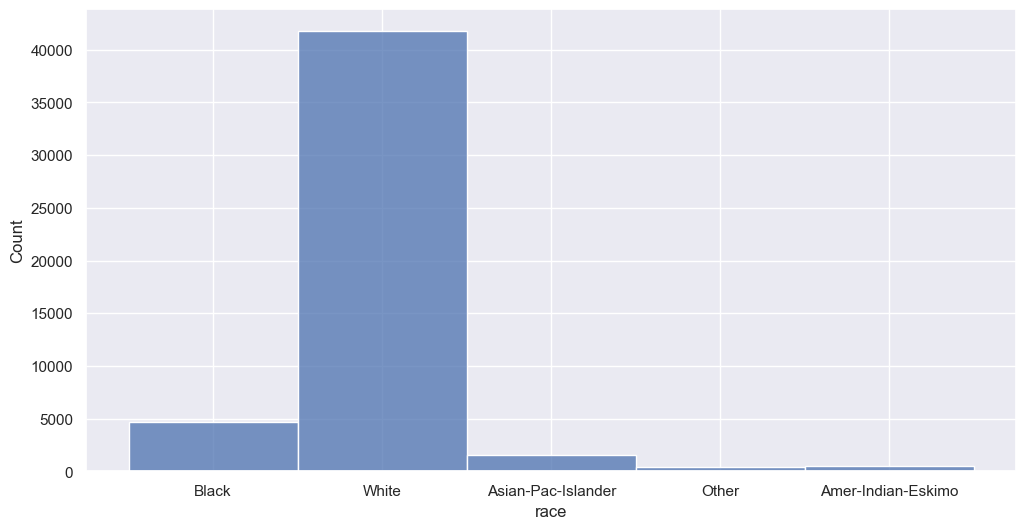

> Var: native-country


,Frecuencia,Porcentaje
United-States,43832,0.913452
Mexico,951,0.019819
Philippines,295,0.006148
Germany,206,0.004293
Puerto-Rico,184,0.003835
Canada,182,0.003793
El-Salvador,155,0.003230
India,151,0.003147
Cuba,138,0.002876
England,127,0.002647


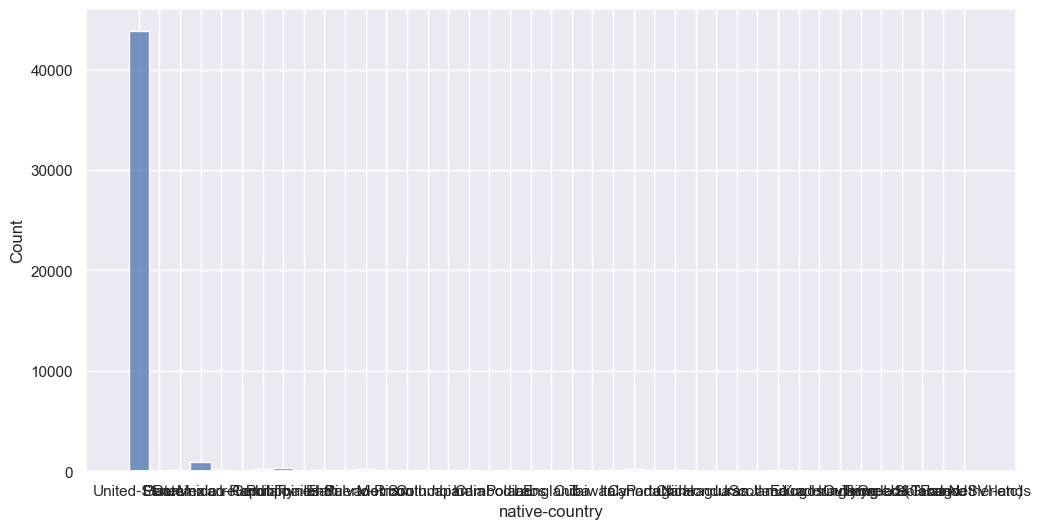

> Var: gender


,Frecuencia,Porcentaje
Male,32650,0.668482
Female,16192,0.331518


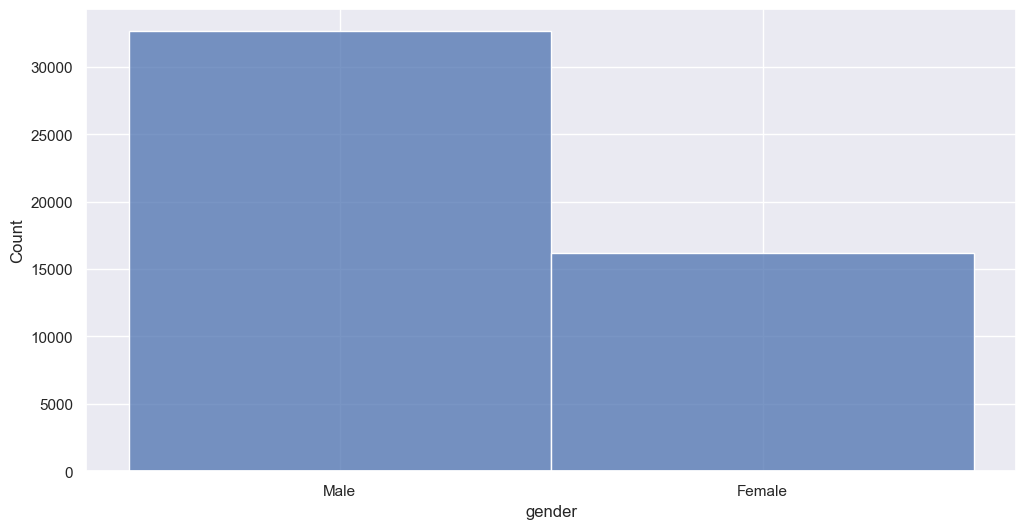

In [6]:
obtener_descripciones_variables(variables_independientes)

<AxesSubplot:>

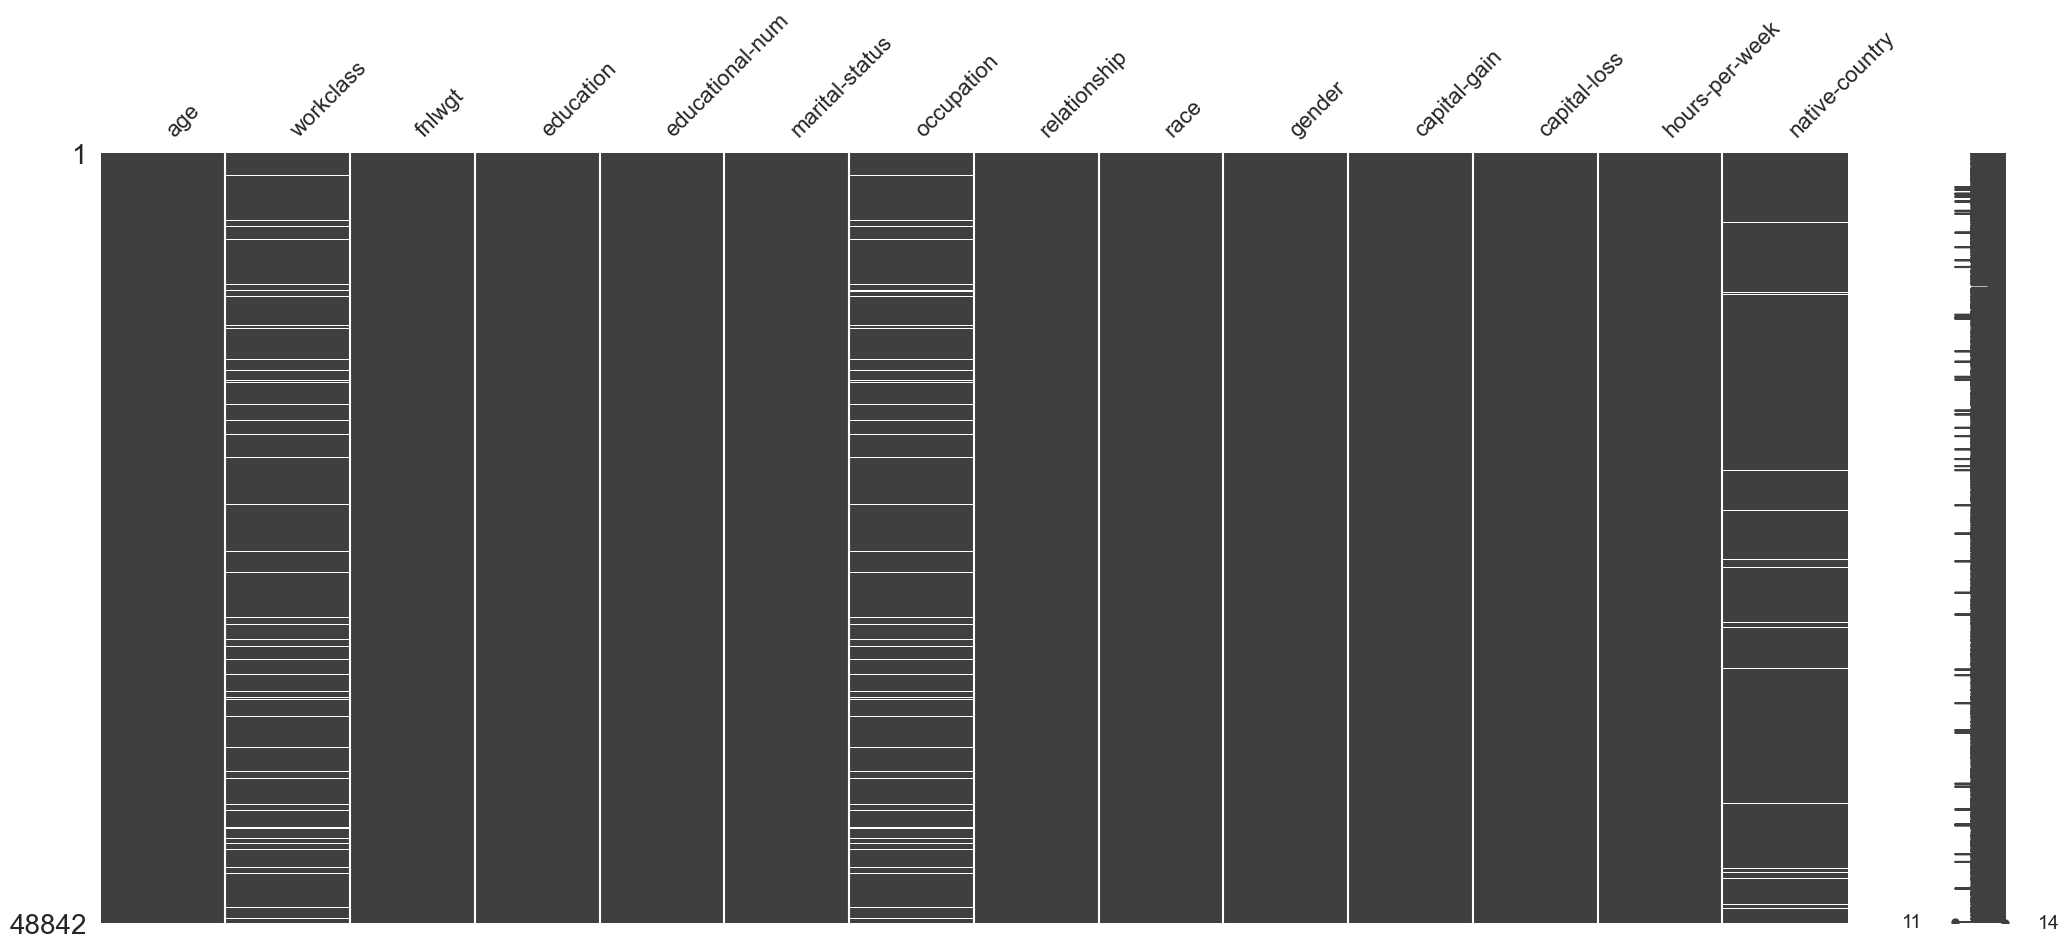

In [7]:
msno.matrix(variables_independientes)